In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [77]:
reds = pd.read_csv('winequality-red.csv', delimiter=';')
reds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [78]:
whites = pd.read_csv('winequality-white.csv', delimiter=';')
whites.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


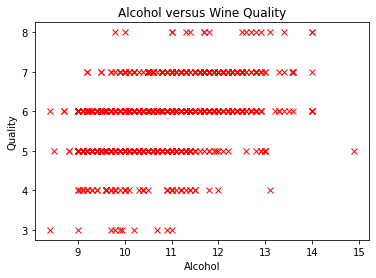

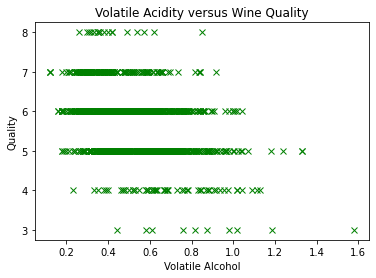

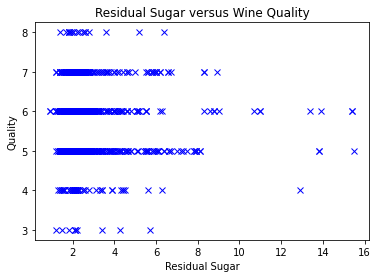

In [79]:
plt.plot(reds["alcohol"], reds["quality"], 'rx')
plt.title("Alcohol versus Wine Quality")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.show()

plt.plot(reds["volatile acidity"], reds["quality"], 'gx')
plt.title("Volatile Acidity versus Wine Quality")
plt.xlabel("Volatile Alcohol")
plt.ylabel("Quality")
plt.show()

plt.plot(reds["residual sugar"], reds["quality"], 'bx')
plt.title("Residual Sugar versus Wine Quality")
plt.xlabel("Residual Sugar")
plt.ylabel("Quality")
plt.show()

In [80]:
from sklearn.model_selection import train_test_split

data_red = reds.values
predictors_red, rating_red = data_red[:,:-1], data_red[:,-1]

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(predictors_red, rating_red, test_size=0.20, random_state = 1) #random state shuffles data

X_train_red = pd.DataFrame(X_train_red)
X_train_red

,0,1,2,3,4,5,6,7,8,9,10
0,7.0,0.650,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5
1,10.2,0.420,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6
2,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0
3,7.2,0.620,0.06,2.5,0.078,17.0,84.0,0.99746,3.51,0.53,9.7
4,7.4,0.640,0.07,1.8,0.100,8.0,23.0,0.99610,3.30,0.58,9.6
...,...,...,...,...,...,...,...,...,...,...,...
1274,7.2,0.490,0.18,2.7,0.069,13.0,34.0,0.99670,3.29,0.48,9.2
1275,9.2,0.580,0.20,3.0,0.081,15.0,115.0,0.99800,3.23,0.59,9.5
1276,6.6,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8
1277,7.2,0.630,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0


In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_red = pd.DataFrame(X_train_red)
X_train_red[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]] = scaler.fit_transform(X_train_red[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]])
X_train_red.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.733079,0.664893,-1.257044,-0.320459,-0.453622,-0.742407,-0.645507,0.240001,0.988460,0.063095,-0.872234
1,1.067741,-0.623462,1.523148,0.608863,-0.369546,-1.125190,-1.112003,0.187899,-1.753513,-0.173904,-0.779785
2,-1.746040,-1.071585,-1.358142,-0.534917,-0.789922,1.075808,0.536281,-2.677737,2.327564,0.774090,3.287990
3,-0.620528,0.496847,-1.054849,-0.034513,-0.201396,0.118853,1.189375,0.375468,1.243528,-0.766400,-0.687335
4,-0.507977,0.608877,-1.004300,-0.534917,0.261018,-0.742407,-0.707707,-0.333126,-0.095575,-0.470152,-0.779785


In [82]:
X_train_red = X_train_red.values
predictors_red, rating_red = X_train_red[:,:-1], X_train_red[:,-1] #predictors and rating from training set

In [58]:
### LASSO AND GRID SEARCH 

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import arange
from numpy import absolute

model1 = Lasso()
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
grid = dict()
grid['alpha'] = arange(0, 1, 0.00001) #start, stop, step size 
search = GridSearchCV(model1, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
results = search.fit(predictors, rating)
print('Mean Squared Error: %f' % absolute(results.best_score_))
print('Best lambda value: %s' % results.best_params_)

Mean Squared Error: 0.328789
Best lambda value: {'alpha': 0.00012000000000000002}


In [84]:
best_model_red = Lasso(alpha = 0.00012000000000000002)
best_model_red.fit(X_train_red, y_train_red)
train_score_red = best_model_red.score(X_train_red,y_train_red)
print("R^2 for reds training data:", round(train_score_red * 100, 3))

R^2 for reds training data: 36.558


In [86]:
best_model_red.fit(X_test_red, y_test_red)
test_score_red = best_model_red.score(X_test_red, y_test_red)
print("R^2 for reds test data:", round(test_score_red * 100, 3))

R^2 for reds test data: 35.057


In [87]:
print(best_model_red.coef_)

[-1.56838752e-02 -8.89795276e-01  2.27173233e-01  2.42466003e-02
 -2.17648342e+00  4.11297044e-04 -2.62490012e-03  0.00000000e+00
 -4.50090481e-01  9.26403462e-01  2.60840940e-01]


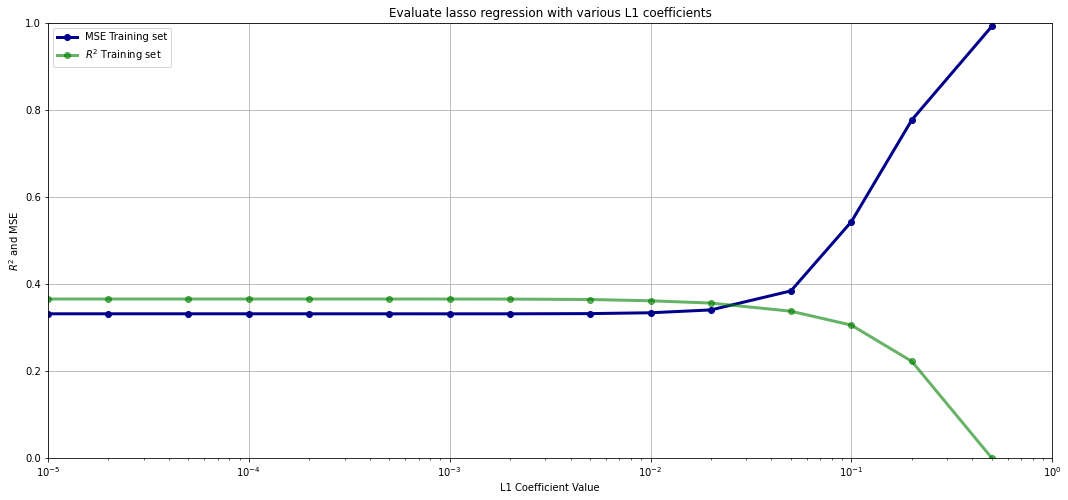

In [89]:
# alphas = arange(0.0001, 0.3, 0.0001)
# l_num = alphas.size

alphas = (.000001, .000002, .000005, .00001, .00002, .00005, .0001, .0002, .0005, .001, .002, .005, .01, .02, .05, .1, .2, .5)
l_num = 18
pred_num = predictors_red.shape[1]

train_r_squared_red = np.zeros(l_num)
train_mse_red = np.zeros(l_num)

cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 1) #n repeats?

for ind, i in enumerate(alphas):    
    # Fit lasso model with the given alpha value
    reg = Lasso(alpha = i)
    reg.fit(X_train_red, y_train_red)
    
    # Calculate MSE and R2 scores
    errors = cross_val_score(reg, predictors_red, rating_red, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    errors = absolute(errors)
    mse = mean(errors)

    # Load scores into plotted DFs
    train_r_squared_red[ind] = reg.score(X_train_red, y_train_red)
    train_mse_red[ind] = mse
    
    
plt.figure(figsize=(18, 8))
plt.plot(alphas, train_mse_red, 'bo-', label=r'MSE Training set', color="darkblue", linewidth=3)
plt.plot(alphas, train_r_squared_red, 'bo-', label=r'$R^2$ Training set', color="green", alpha=0.6, linewidth=3)
plt.xlabel('L1 Coefficient Value'); plt.ylabel(r'$R^2$ and MSE')
plt.xscale("log")
plt.xlim(0.00001, 1)
plt.ylim(0, 1)
plt.title(r'Evaluate lasso regression with various L1 coefficients')
plt.legend(loc='best')
plt.grid()

In [62]:
### Trying ridge regression ###

from sklearn.linear_model import Ridge
model1 = Ridge()
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
grid = dict()
grid['alpha'] = arange(0, 1, 0.00001) #start, stop, step size 
search = GridSearchCV(model1, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
results = search.fit(predictors, rating)
print('Mean Squared Error: %f' % absolute(results.best_score_))
print('Best lambda value: %s' % results.best_params_)

Mean Squared Error: 0.328788
Best lambda value: {'alpha': 0.26317}


In [88]:
best_model = Ridge(alpha = 0.26317)
best_model.fit(X_train, y_train)
train_score = best_model.score(X_train,y_train)
print("R^2 for reds training data (ridge):", round(train_score * 100, 3))
print(best_model.coef_)

R^2 for reds training data (ridge): 27.92
[ 0.04240114 -0.19761341 -0.00111231  0.39048366 -0.01253152  0.05429668
 -0.00215981 -0.40650974  0.10160055  0.06331165  0.25434934]


In [90]:
##### WHITE WINE DATASET #####

data_white = whites.values
predictors_white, rating_white = data_white[:,:-1], data_white[:,-1]

X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(predictors_white, rating_white, test_size=0.20, random_state = 1) #random state shuffles data

X_train_white = pd.DataFrame(X_train_white)

scaler = StandardScaler()
X_train_white = pd.DataFrame(X_train_white)
X_train_white[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]] = scaler.fit_transform(X_train_white[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]])

X_train_white = X_train_white.values
predictors_white, rating_white = X_train_white[:,:-1], X_train_white[:,-1]

In [65]:
model_whites = Lasso()
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
grid = dict()
grid['alpha'] = arange(0, 1, 0.00001) #start, stop, step size 
search = GridSearchCV(model_whites, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
results = search.fit(predictors, rating)
print('Mean Squared Error: %f' % absolute(results.best_score_))
print('Best lambda value: %s' % results.best_params_)

Mean Squared Error: 0.148814
Best lambda value: {'alpha': 0.0024000000000000002}


In [91]:
best_model_white = Lasso(alpha = 0.0024000000000000002)
best_model_white.fit(X_train_white, y_train_white)
train_score_white = best_model_white.score(X_train_white,y_train_white)
print("R^2 for whites training data:", round(train_score_white * 100, 3))

R^2 for whites training data: 27.866


In [92]:
best_model_white.fit(X_test_white, y_test_white)
test_score_white = best_model_white.score(X_test_white, y_test_white)
print("R^2 for whites test data:", round(test_score_white * 100, 3))

R^2 for whites test data: 28.506


In [94]:
print(best_model_white.coef_)

[-0.02270474 -1.31876669  0.          0.02263887 -0.          0.008613
 -0.00258854 -0.          0.          0.49564617  0.3566296 ]


0.15160555763986655
0.4235988151841004


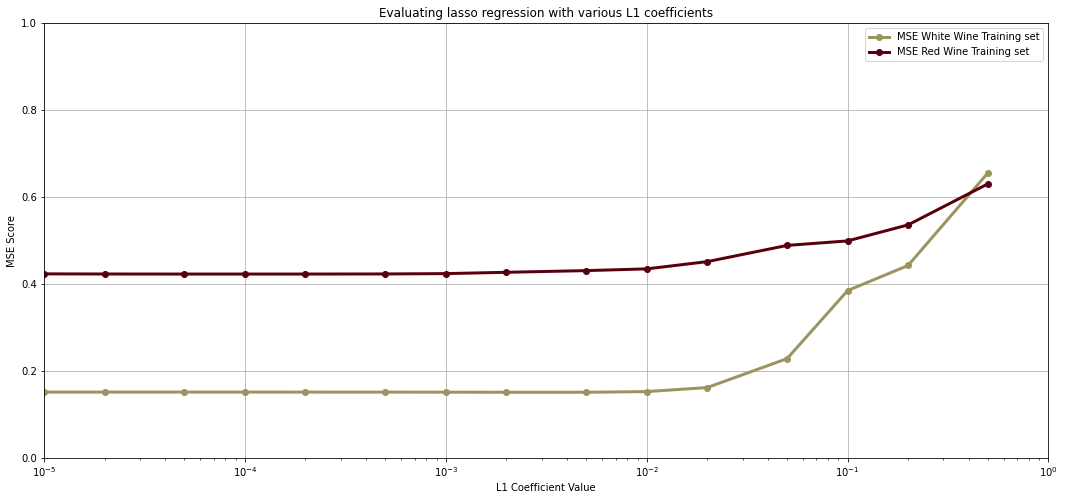

In [77]:
alphas = (.000001, .000002, .000005, .00001, .00002, .00005, .0001, .0002, .0005, .001, .002, .005, .01, .02, .05, .1, .2, .5)
l_num = 18
pred_num = predictors_white.shape[1]

train_r_squared_white = np.zeros(l_num)
train_mse_white = np.zeros(l_num)

cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 1) #n repeats?

for ind, i in enumerate(alphas):    
    # Fit lasso model with the given alpha value
    reg = Lasso(alpha = i)
    reg.fit(X_train_white, y_train_white)
    
    # Calculate MSE and R2 scores
    errors = cross_val_score(reg, predictors_white, rating_white, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    errors = absolute(errors)
    mse = mean(errors)

    # Load scores into plotted DFs
    train_r_squared_white[ind] = reg.score(X_train, y_train)
    train_mse_white[ind] = mse
    
    
plt.figure(figsize=(18, 8))
plt.plot(alphas, train_mse_white, 'bo-', label=r'MSE White Wine Training set', color="#9c9460", linewidth=3)
# plt.plot(alphas, train_r_squared_white, 'bo-', label=r'$R^2$ White Wine Training set', color="#9c9460", linewidth=3, linestyle='dashed')

plt.plot(alphas, train_mse_red, 'bo-', label=r'MSE Red Wine Training set', color="#59000f", linewidth=3)
# plt.plot(alphas, train_r_squared_red, 'bo-', label=r'$R^2$ Red Wine Training set', color="#59000f", linewidth=3, linestyle='dashed')


plt.xlabel('L1 Coefficient Value'); plt.ylabel(r'MSE Score')
plt.xscale("log")
plt.xlim(0.00001, 1)
plt.ylim(0, 1)
plt.title(r'Evaluating lasso regression with various L1 coefficients')
plt.legend(loc='best')
plt.grid()


In [69]:
### trying ridge regression ###

model1 = Ridge()
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
grid = dict()
grid['alpha'] = arange(0, 1, 0.00001) #start, stop, step size 
search = GridSearchCV(model1, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
results = search.fit(predictors, rating)
print('Mean Squared Error: %f' % absolute(results.best_score_))
print('Best lambda value: %s' % results.best_params_)

Mean Squared Error: 0.149180
Best lambda value: {'alpha': 0.99999}


In [70]:
best_model = Ridge(alpha = 0.99999)
best_model.fit(X_train, y_train)
train_score = best_model.score(X_train,y_train)
print("R^2 for training data:", round(train_score * 100, 3))
print(best_model.coef_)

R^2 for training data: 27.92
[ 0.04177709 -0.19761634 -0.00113269  0.38859839 -0.01266657  0.05440674
 -0.00230307 -0.40375996  0.10107869  0.06315026  0.25549393]


In [71]:
best_model.fit(X_test, y_test)
test_score = best_model.score(X_test,y_test)
print("R^2 for test data:", round(test_score * 100, 3))
print(best_model.coef_)

R^2 for test data: 28.63
[-0.02638613 -1.39406442  0.10499621  0.02364215 -0.07676272  0.00839721
 -0.00257887 -0.0505429   0.05629355  0.603596    0.35971093]
